In [29]:
# Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
#If you work on Google Colab, upload the dataset document
from google.colab import files
uploaded = files.upload()

Saving sentiment_dataset.csv to sentiment_dataset.csv


In [31]:
# Load the dataset
df = pd.read_csv("sentiment_dataset.csv")

In [32]:
# Print the first 5 rows
print(df.head())

                                            text sentiment
0           I love this product, it works great!  positive
1     Absolutely terrible, I want my money back.  negative
2                Just okay, not what I expected.   neutral
3          Amazing experience, highly recommend.  positive
4  Worst purchase ever, completely dissatisfied.  negative


In [33]:
# Print the last 5 rowa
print(df.tail())

                                     text sentiment
95          Pretty good, would buy again.  positive
96          Not bad, but could be better.   neutral
97  Fantastic service and friendly staff.  positive
98           Horrible, never coming back.  negative
99            Decent quality, fair price.   neutral


In [34]:
# Data preprocessing function using NLTK
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)

In [35]:
# Apply preprocessing to the text column
df['text'] = df['text'].apply(preprocess_text)

In [36]:
# Data split into train and test sets
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Transform text data to feature vectors using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [38]:
# Model training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [39]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) # Assign the accuracy score to the variable 'accuracy'
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         4
     neutral       1.00      1.00      1.00         4
    positive       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [41]:
# Save the model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved.")

Model and vectorizer saved.


In [42]:
# NLTK Analysis - Sentiment Distribution
sentiment_counts = Counter(df['sentiment'])
print("Sentiment Distribution:\n", sentiment_counts)

Sentiment Distribution:
 Counter({'positive': 40, 'negative': 30, 'neutral': 30})


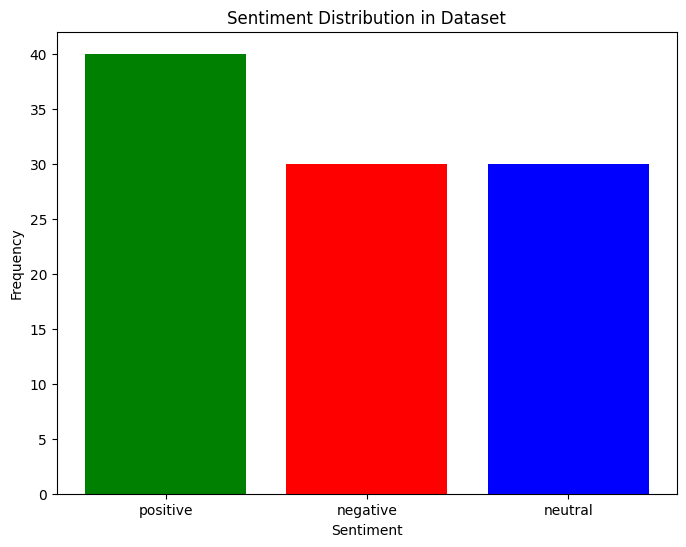

In [43]:
# Plotting Sentiment Distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution in Dataset')
plt.show()

In [44]:
# NLTK Analysis - Most Common Words
all_words = ' '.join(df['text']).split()
common_words = Counter(all_words).most_common(10)
print("Most Common Words:\n", common_words)

Most Common Words:
 [('back', 20), ('love', 10), ('product', 10), ('work', 10), ('great', 10), ('absolut', 10), ('terribl', 10), ('want', 10), ('money', 10), ('okay', 10)]


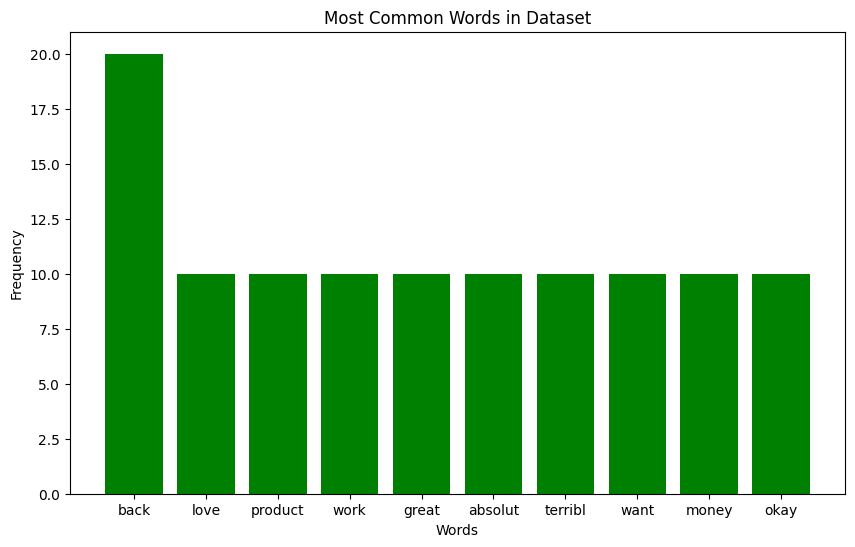

In [46]:
# Plotting Most Common Words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Dataset')
plt.show()